<a href="https://colab.research.google.com/github/israelIsiaka/web_scrapping/blob/main/Exploring_data_from_a_data_base_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import sqlite3
import pandas as pd



In [7]:
# If connecting from google drive, past the right path and create connection
connection = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/lab.db')

In [8]:
# Connect to the database
conn = sqlite3.connect('/content/drive/My Drive/wa_data.db')

# Create a cursor object
cursor = conn.cursor()

# Execute a query to get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the table names
tables = cursor.fetchall()

# Print the table names
print("Tables in the database:")
for table in tables:
    print(table[0])

# Close the connection
conn.close()

Tables in the database:
Customer
Products
Returns
Sales


In [39]:
# Connect to the database
conn = sqlite3.connect('/content/drive/My Drive/wa_data.db')
#Reading from the db the Customers Table

sales_df=pd.read_sql_query("SELECT  * FROM Customer", conn)
sales_df.head(5)


,CustomerKey,FirstName,LastName,BirthDate,MaritalStatus,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,JON,YANG,4/8/1966,M,jon24@adventure-works.com,90000,2,Bachelors,Professional,Y
1,11001,EUGENE,HUANG,5/14/1965,S,eugene10@adventure-works.com,60000,3,Bachelors,Professional,N
2,11002,RUBEN,TORRES,8/12/1965,M,ruben35@adventure-works.com,60000,3,Bachelors,Professional,Y
3,11003,CHRISTY,ZHU,2/15/1968,S,christy12@adventure-works.com,70000,0,Bachelors,Professional,N
4,11004,ELIZABETH,JOHNSON,8/8/1968,S,elizabeth5@adventure-works.com,80000,5,Bachelors,Professional,Y


In [18]:
# Reading from the db the Product Table

sales_df=pd.read_sql_query("SELECT  * FROM Products", conn)
sales_df.head(5)


,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey,CategoryName
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900,Helmets,4,Accessories
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442,Helmets,4,Accessories
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000,Socks,3,Clothing
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000,Socks,3,Clothing
4,220,31,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442,Helmets,4,Accessories


In [19]:
# Reading from the db the Returns data Table

sales_df=pd.read_sql_query("SELECT  * FROM Returns", conn)
sales_df.head(5)


,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity,Region,Country,Continent
0,2015-01-18,9,312,1,Australia,Australia,Pacific
1,2015-01-18,10,310,1,United Kingdom,United Kingdom,Europe
2,2015-01-21,8,346,1,Germany,Germany,Europe
3,2015-01-22,4,311,1,Southwest,United States,North America
4,2015-02-02,6,312,1,Canada,Canada,North America


In [21]:
# Reading from the db the Sales Table

sales_df=pd.read_sql_query("SELECT  * FROM Sales", conn)
sales_df.head(5)

# Close the connection after reading
#conn.close()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,Continent
0,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,North America
1,2016-01-01,2002-09-30,SO48802,383,24923,9,1,1,Australia,Australia,Pacific
2,2016-01-01,2002-11-29,SO48801,326,15493,1,1,1,Northwest,United States,North America
3,2016-01-01,2002-11-16,SO48799,352,26708,4,1,1,Southwest,United States,North America
4,2016-01-01,2002-12-16,SO48798,369,23332,9,1,1,Australia,Australia,Pacific


In [22]:
# Connect to the database
conn = sqlite3.connect('/content/drive/My Drive/wa_data.db')

# Read data from the db, joining Returns and Products tables
returns_products_df = pd.read_sql_query("""
SELECT
    r.Region,
    p.ProductName
FROM
    Returns AS r
JOIN
    Products AS p ON r.ProductKey = p.ProductKey
""", conn)

# Display the first few rows of the resulting DataFrame
display(returns_products_df.head())



,Region,ProductName
0,Australia,"Road-150 Red, 48"
1,United Kingdom,"Road-150 Red, 62"
2,Germany,"Mountain-100 Silver, 44"
3,Southwest,"Road-150 Red, 44"
4,Canada,"Road-150 Red, 48"


In [38]:

# Read data from the Customer table for 'Clerical' occupation
clerical_customers_df = pd.read_sql_query("""
SELECT *
FROM Customer
WHERE Occupation = 'Clerical'
""", conn)

# Display the first few rows of the resulting DataFrame
display(clerical_customers_df.head())



ProgrammingError: Cannot operate on a closed database.

In [31]:
# Connect to the database
conn = sqlite3.connect('/content/drive/My Drive/wa_data.db')

# Read CustomerKey for 'Clerical' occupation and save to ClericalCustomer variable
ClericalCustomer = pd.read_sql_query("""
SELECT CustomerKey
FROM Customer
WHERE Occupation = 'Clerical'
""", conn)

# Display the resulting DataFrame
display(ClericalCustomer)

,CustomerKey
0,11018
1,11025
2,11026
3,11027
4,11028
...,...
5713,29479
5714,29480
5715,29481
5716,29482


In [34]:
# Connect to the database
conn = sqlite3.connect('/content/drive/My Drive/wa_data.db')

# Get the list of CustomerKeys for Clerical occupation
clerical_customer_keys = ClericalCustomer['CustomerKey'].tolist()

# Read orders from the Sales table for Clerical customers
ClericalCustomerOrders = pd.read_sql_query(f"""
SELECT *
FROM Sales
WHERE CustomerKey IN ({','.join(map(str, clerical_customer_keys))})
""", conn)

# Display the first few rows of the resulting DataFrame
display(ClericalCustomerOrders.head())

display(ClericalCustomerOrders.count())


,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,Continent
0,2016-01-02,2002-12-01,SO48804,356,12276,8,1,1,Germany,Germany,Europe
1,2016-01-02,2002-09-15,SO48803,383,19416,10,1,1,United Kingdom,United Kingdom,Europe
2,2016-01-02,2002-10-27,SO48807,324,20892,10,1,1,United Kingdom,United Kingdom,Europe
3,2016-01-02,2002-10-10,SO48805,330,19318,7,1,1,France,France,Europe
4,2016-01-02,2002-12-11,SO48808,368,16552,8,1,1,Germany,Germany,Europe


,0
OrderDate,8850
StockDate,8850
OrderNumber,8850
ProductKey,8850
CustomerKey,8850
TerritoryKey,8850
OrderLineItem,8850
OrderQuantity,8850
Region,8850
Country,8850


Using sub query, get the total number of orders by "manual" customers in January 2015

In [36]:
# SQL query to get the total number of orders by 'Manual' customers in January 2015 using a subquery
query = """
SELECT COUNT(*) AS TotalOrders
FROM Sales
WHERE CustomerKey IN (
    SELECT CustomerKey
    FROM Customer
    WHERE Occupation = 'Manual'
)
AND OrderDate BETWEEN '2015-01-01' AND '2015-01-31';
"""

# Print the result
print(f"Total number of orders by 'Manual' customers in January 2015: {total_orders}")

Total number of orders by 'Manual' customers in January 2015: 13


Categorize sales into two groups, high sales and low sales based on the total value of the order for each product if they are greater or less than 25,000. What category is "AWC Logo Cap" and "Classic Vest, L" respectively?

In [ ]:
# SQL query to get the total number of orders by 'Manual' customers in January 2015 using a subquery
query = """
SELECT COUNT(*) AS TotalOrders
FROM Sales
WHERE CustomerKey IN (
    SELECT CustomerKey
    FROM Customer
    WHERE Occupation = 'Manual'
)
AND OrderDate BETWEEN '2015-01-01' AND '2015-01-31';
"""

# Print the result
print(f"Total number of orders by 'Manual' customers in January 2015: {total_orders}")

Total number of orders by 'Manual' customers in January 2015: 13


Categorize sales into two groups, high sales and low sales based on the total value of the order for each product if they are greater or less than 25,000. What category is "AWC Logo Cap" and "Classic Vest, L" respectively?

In [67]:
sales_df=pd.read_sql_query("SELECT  * FROM Sales", conn)
sales_df.head(90)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,Continent
0,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,North America
1,2016-01-01,2002-09-30,SO48802,383,24923,9,1,1,Australia,Australia,Pacific
2,2016-01-01,2002-11-29,SO48801,326,15493,1,1,1,Northwest,United States,North America
3,2016-01-01,2002-11-16,SO48799,352,26708,4,1,1,Southwest,United States,North America
4,2016-01-01,2002-12-16,SO48798,369,23332,9,1,1,Australia,Australia,Pacific
...,...,...,...,...,...,...,...,...,...,...,...
85,2016-01-11,2002-12-21,SO48880,368,13746,4,1,1,Southwest,United States,North America
86,2016-01-11,2002-10-16,SO48879,362,12526,10,1,1,United Kingdom,United Kingdom,Europe
87,2016-01-11,2002-12-12,SO48878,375,17715,10,1,1,United Kingdom,United Kingdom,Europe
88,2016-01-11,2002-11-20,SO48882,362,26801,4,1,1,Southwest,United States,North America


Total number of orders by 'Manual' customers in January 2015: 13


In [50]:
# Group by ProductKey and sum the OrderQuantity
product_order_quantity = sales_df.groupby('ProductKey')['OrderQuantity'].sum().reset_index()

# Display the result
display(product_order_quantity)

,ProductKey,OrderQuantity
0,214,2099
1,215,1940
2,220,1995
3,223,4151
4,226,392
...,...,...
125,599,55
126,600,41
127,604,356
128,605,355


In [51]:
# Filter the DataFrame to show products with OrderQuantity less than 25000
product_order_quantity_less_than_25000 = product_order_quantity[product_order_quantity['OrderQuantity'] < 25000]

# Display the filtered DataFrame
display(product_order_quantity_less_than_25000)

,ProductKey,OrderQuantity
0,214,2099
1,215,1940
2,220,1995
3,223,4151
4,226,392
...,...,...
125,599,55
126,600,41
127,604,356
128,605,355


In [52]:
# Filter the DataFrame to show products with OrderQuantity greater than 25000
product_order_quantity_greater_than_25000 = product_order_quantity[product_order_quantity['OrderQuantity'] > 25000]

# Display the filtered DataFrame
display(product_order_quantity_greater_than_25000)

,ProductKey,OrderQuantity


What is the Quantity of the top selling product in United Kingdom?


In [69]:
# Group by ProductKey and Region and sum the OrderQuantity from sales_df
product_region_order_quantity = sales_df.groupby(['ProductKey', 'Region'])['OrderQuantity'].sum().reset_index()

# Display the result
display(product_region_order_quantity.head())

,ProductKey,Region,OrderQuantity
0,214,Australia,430
1,214,Canada,240
2,214,France,234
3,214,Germany,239
4,214,Northeast,1


In [84]:
# Filter the DataFrame for the 'United Kingdom' region
uk_sales = product_region_order_quantity[product_region_order_quantity['Region'] == 'United Kingdom']

# Sort the DataFrame by OrderQuantity in descending order
uk_sales_sorted = uk_sales.sort_values(by='OrderQuantity', ascending=True)

# Display the sorted DataFrame
display(uk_sales_sorted)

,ProductKey,Region,OrderQuantity
229,350,United Kingdom,1
216,348,United Kingdom,2
236,351,United Kingdom,2
205,346,United Kingdom,2
193,344,United Kingdom,3
...,...,...,...
590,530,United Kingdom,548
479,480,United Kingdom,601
582,529,United Kingdom,614
35,223,United Kingdom,638


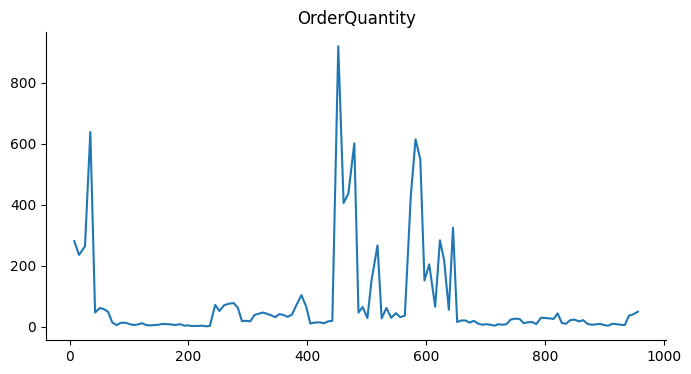

In [74]:
# @title OrderQuantity

from matplotlib import pyplot as plt
uk_sales['OrderQuantity'].plot(kind='line', figsize=(8, 4), title='OrderQuantity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
United Kingdom 214

In [85]:

# Read data from the Products table for ProductKey 214
product_214_df = pd.read_sql_query("SELECT * FROM Products WHERE ProductKey = 214", conn)

# Display the resulting DataFrame
display(product_214_df)


,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey,CategoryName
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.99,Helmets,4,Accessories


In [86]:
# Filter the DataFrame in Canada region
Canada_sales = product_region_order_quantity[product_region_order_quantity['Region'] == 'Canada']

# Sort the DataFrame by OrderQuantity in descending order
Canada_sales_sorted = Canada_sales.sort_values(by='OrderQuantity', ascending=True)

# Display the sorted DataFrame
display(Canada_sales_sorted)

,ProductKey,Region,OrderQuantity
109,322,Canada,1
195,345,Canada,1
201,346,Canada,1
159,336,Canada,1
823,585,Canada,1
...,...,...,...
454,478,Canada,654
510,485,Canada,724
471,480,Canada,908
444,477,Canada,1105
